**Assignment 3**

Specifying data paths

In [0]:
dataPath='/content/drive/My Drive/Sem8/DS/ASS/ASS3/data.txt'
dataDescriptionPath='/content/drive/My Drive/Sem8/DS/ASS/ASS3/balance-scale.names'

file=open(dataDescriptionPath,"r")
print(file.read())

1. Title: Balance Scale Weight & Distance Database

2. Source Information: 
    (a) Source: Generated to model psychological experiments reported
		by Siegler, R. S. (1976).  Three Aspects of Cognitive
		Development.  Cognitive Psychology, 8, 481-520.
    (b) Donor: Tim Hume (hume@ics.uci.edu)
    (c) Date: 22 April 1994

3. Past Usage: (possibly different formats of this data)
   - Publications
	1. Klahr, D., & Siegler, R.S. (1978).  The Representation of
	   Children's Knowledge.  In H. W. Reese & L. P. Lipsitt (Eds.),
	   Advances in Child Development and Behavior, pp. 61-116.  New
	   York: Academic Press 
	2. Langley,P. (1987).  A General Theory of Discrimination
	   Learning.  In D. Klahr, P. Langley, & R. Neches (Eds.),
	   Production System Models of Learning and Development, pp.
	   99-161. Cambridge, MA: MIT Press
	3. Newell, A. (1990).  Unified Theories of Cognition.
	   Cambridge, MA: Harvard University Press
	4. McClelland, J.L. (1988).  Parallel Distibuted Processing:
	  

Reading data

In [0]:
import pandas as pd
balance_scale_data = pd.read_csv(dataPath,delimiter=',',header=None)
print(balance_scale_data.head())

   0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


Dividing into label and attributes

In [0]:
X=balance_scale_data[balance_scale_data.columns[1:5]]
print("Attributes:\n",X.head())
y=balance_scale_data[0]
print("Label:\n",y.head())

Attributes:
    1  2  3  4
0  1  1  1  1
1  1  1  1  2
2  1  1  1  3
3  1  1  1  4
4  1  1  1  5
Label:
 0    B
1    R
2    R
3    R
4    R
Name: 0, dtype: object


Splitting the data into 70,30 ratio

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

**KNN implementation**

Finding best number of neighbors for KNN using gridSearchCV learnt from datacamp

In [0]:
from sklearn.neighbors import KNeighborsClassifier
param_Grid={'n_neighbors':range(1,11)}
knn=KNeighborsClassifier()
knn=GridSearchCV(knn,param_Grid)
knn.fit(X,y)
bestNeighbors=knn.best_params_
print('Optimal number of neigbors: ',bestNeighbors)

Optimal number of neigbors:  {'n_neighbors': 9}


KNN using train test split data

In [0]:
accScore=[]
f1Score=[]

knn=KNeighborsClassifier(n_neighbors=bestNeighbors.get('n_neighbors'))
for i in range(1,11):
  X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  accScore.append(accuracy_score(y_test, y_pred))
  f1Score.append(f1_score(y_test, y_pred, average='macro'))


KNN using Cross validation

In [0]:
knn=KNeighborsClassifier(n_neighbors=bestNeighbors.get('n_neighbors'))
scoreKnn = cross_validate(knn, X, y, cv=10,scoring=('accuracy','f1_macro'))

print(scoreKnn['test_accuracy'].mean())
print(scoreKnn['test_f1_macro'].mean())

0.8209677419354838
0.5943982427609807


Plotting the metrices

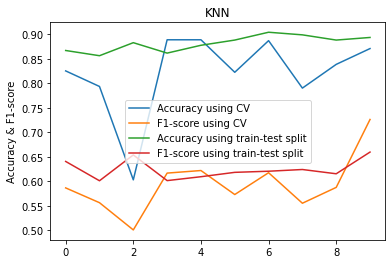

In [0]:
import matplotlib.pyplot as plt
plt.plot(scoreKnn['test_accuracy'],label='Accuracy using CV')
plt.plot(scoreKnn['test_f1_macro'],label='F1-score using CV')
plt.plot(accScore,label='Accuracy using train-test split')
plt.plot(f1Score,label='F1-score using train-test split')
plt.ylabel('Accuracy & F1-score')
plt.title('KNN')
plt.legend()
plt.show()


**Naive Bayes**

Train test split

In [0]:
from sklearn.naive_bayes import GaussianNB

accScore=[]
f1Score=[]
naiveBayes = GaussianNB()

for i in range(1,11):
  X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3)

  naiveBayes = naiveBayes.fit(X_train, y_train)
  y_pred=naiveBayes.predict(X_test)
  accScore.append(accuracy_score(y_test, y_pred))
  f1Score.append(f1_score(y_test, y_pred, average='macro'))


Cross validation

In [0]:
naiveBayes = GaussianNB()

scoreNaive = cross_validate(naiveBayes, X, y, cv=10,scoring=('accuracy','f1_macro'))

print(scoreNaive['test_accuracy'].mean())
print(scoreNaive['test_f1_macro'].mean())

0.8415770609318995
0.5822386328286053


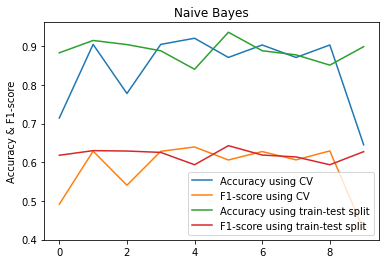

In [0]:
plt.plot(scoreNaive['test_accuracy'],label='Accuracy using CV')
plt.plot(scoreNaive['test_f1_macro'],label='F1-score using CV')
plt.plot(accScore,label='Accuracy using train-test split')
plt.plot(f1Score,label='F1-score using train-test split')
plt.ylabel('Accuracy & F1-score')
plt.title('Naive Bayes')
plt.legend()
plt.show()


**SVM**

Train test split

In [0]:
from sklearn.svm import SVC
svm = SVC(C=1.0, kernel='rbf')
accScore=[]
f1Score=[]

for i in range(1,11):
  X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3)

  svm=svm.fit(X_train, y_train)
  y_pred=svm.predict(X_test)
  accScore.append(accuracy_score(y_test, y_pred))
  f1Score.append(f1_score(y_test, y_pred, average='macro'))



Cross validation

In [0]:
svm = SVC(C=1.0, kernel='rbf')

score_SVM = cross_validate(svm, X, y, cv=10,scoring=('accuracy','f1_macro'))

print(score_SVM['test_accuracy'].mean())
print(score_SVM['test_f1_macro'].mean())

0.8688940092165899
0.6031098688126378


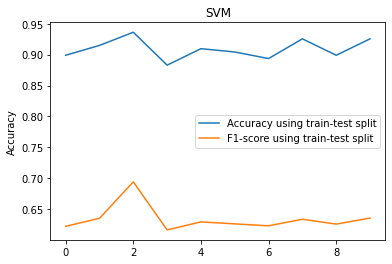

In [0]:
# plt.plot(score_SVM['test_accuracy'],label='Accuracy using CV')
# plt.plot(score_SVM['test_f1_macro'],label='F1-score using CV')
plt.plot(accScore,label='Accuracy using train-test split')
plt.plot(f1Score,label='F1-score using train-test split')
# plt.ylabel('Accuracy & F1-score')
plt.ylabel('Accuracy')
plt.title('SVM')
plt.legend()
plt.show()


**Decision tree**

Train test split

In [0]:

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
accScore=[]
f1Score=[]

for i in range(1,11):
  X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3)

  dt=dt.fit(X_train, y_train)
  y_pred=dt.predict(X_test)
  accScore.append(accuracy_score(y_test, y_pred))
  f1Score.append(f1_score(y_test, y_pred, average='macro'))



Cross validation

In [0]:
dt = DecisionTreeClassifier(random_state=0)

score_DT = cross_validate(dt, X, y, cv=10,scoring=('accuracy','f1_macro'))

print(score_DT['test_accuracy'].mean())
print(score_DT['test_f1_macro'].mean())

0.6704301075268816
0.4989487530522216


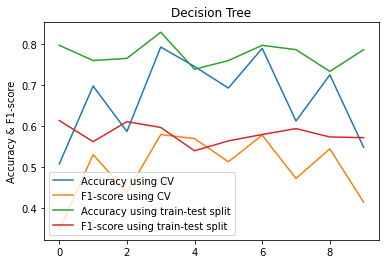

In [0]:
plt.plot(score_DT['test_accuracy'],label='Accuracy using CV')
plt.plot(score_DT['test_f1_macro'],label='F1-score using CV')
plt.plot(accScore,label='Accuracy using train-test split')
plt.plot(f1Score,label='F1-score using train-test split')
plt.ylabel('Accuracy & F1-score')
plt.title('Decision Tree')
plt.legend()
plt.show()
